In [1]:
import sys
sys.path.append('../')

import pennylane as qml 
import pennylane.numpy as np 
import matplotlib.pyplot as plt 

from main.circuits import ZGR_ansatz

You can define a ZGR ansatz

(<Figure size 3200x500 with 1 Axes>, <Axes: >)

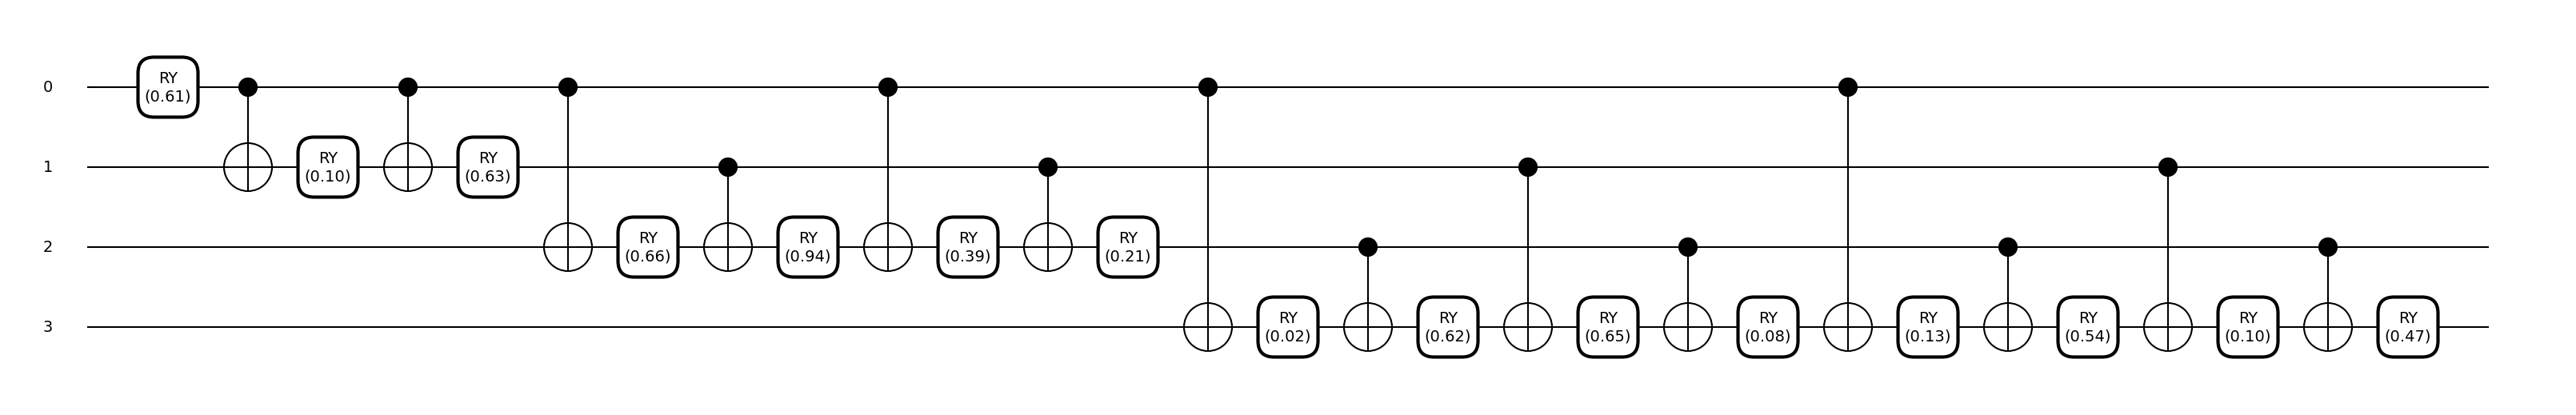

In [2]:
num_qubits = 4

ansatz = ZGR_ansatz(num_qubits)
params = np.random.rand(ansatz.num_params)

qml.draw_mpl(ansatz.construct_circuit, decimals=2)(params)

or a ZGR-like ansatz with Matrix Product State (MPS) structure, up to a given bond dimension

(<Figure size 1600x500 with 1 Axes>, <Axes: >)

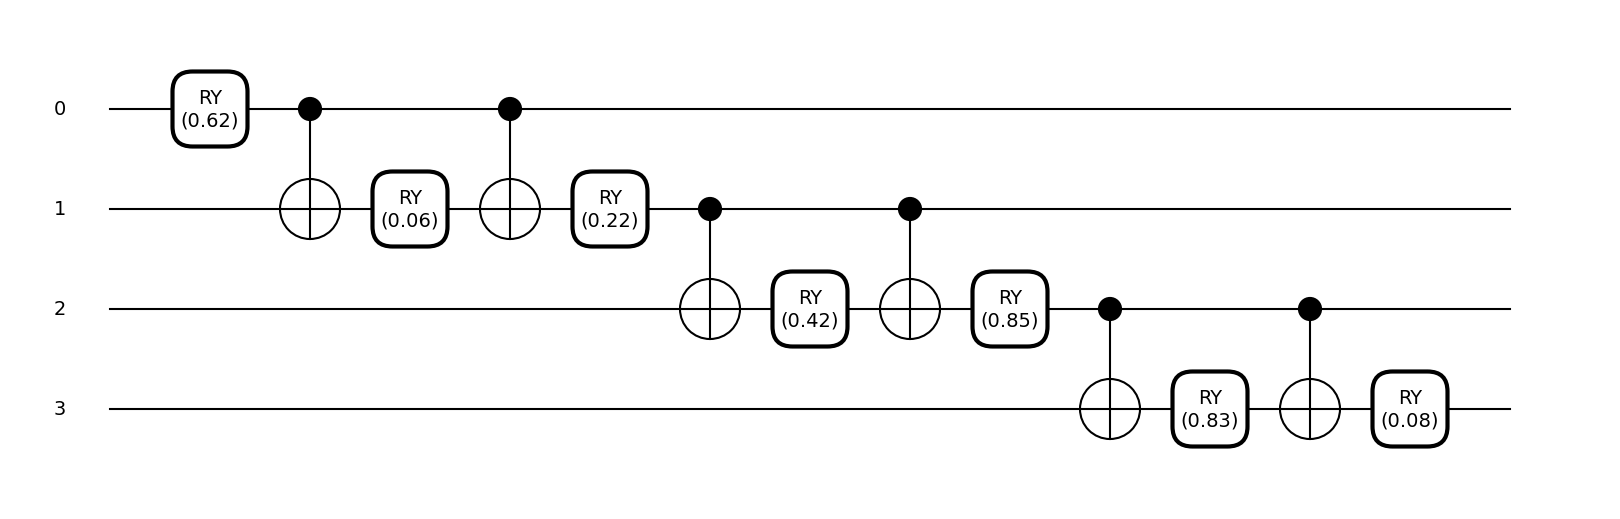

In [3]:
bond_dim = 2

ansatz_mps = ZGR_ansatz(num_qubits, bond_dim=bond_dim)
params_mps = np.random.rand(ansatz_mps.num_params)
qml.draw_mpl(ansatz_mps.construct_circuit, decimals=2)(params_mps)

You can also define a new ansatz with a larger bond dimension, and use the `extend_params` method to adapt the parameters from the smaller circuit, such that the larger circuit is equivalent to the smaller one.

In [4]:
larger_bond_dim = 3

ansatz_larger = ZGR_ansatz(num_qubits, bond_dim=larger_bond_dim)
params_larger = ansatz_larger.extend_params(ansatz_mps, params_mps)

(<Figure size 2400x500 with 1 Axes>, <Axes: >)

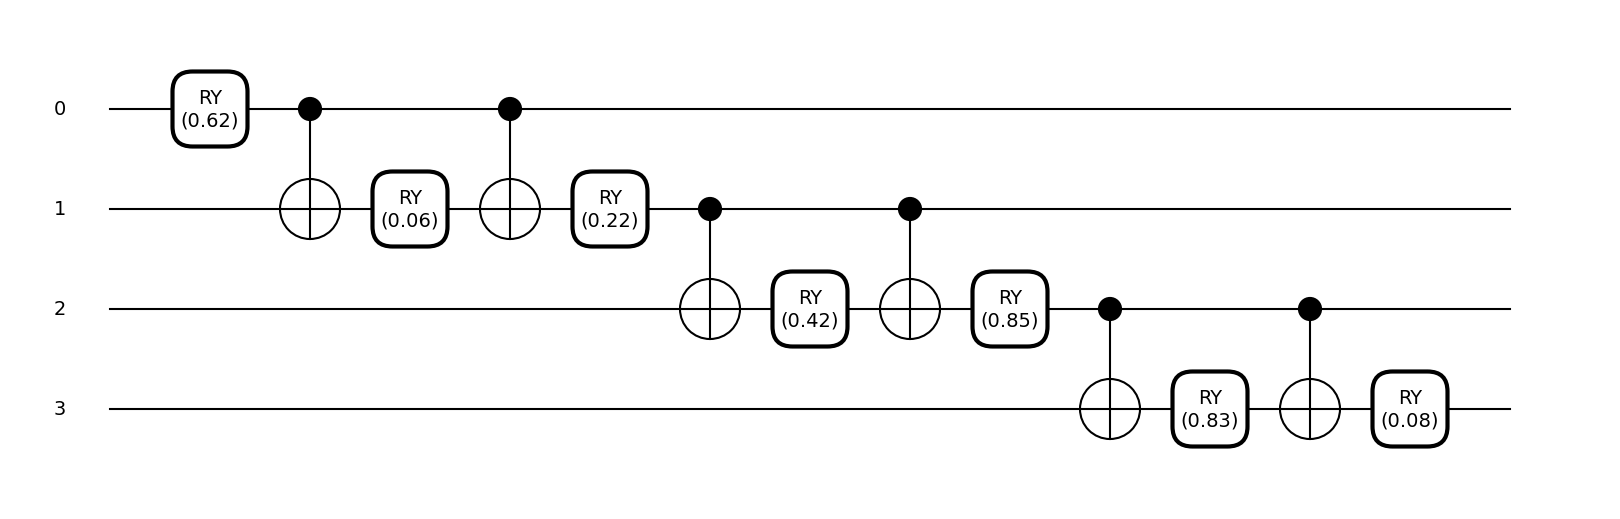

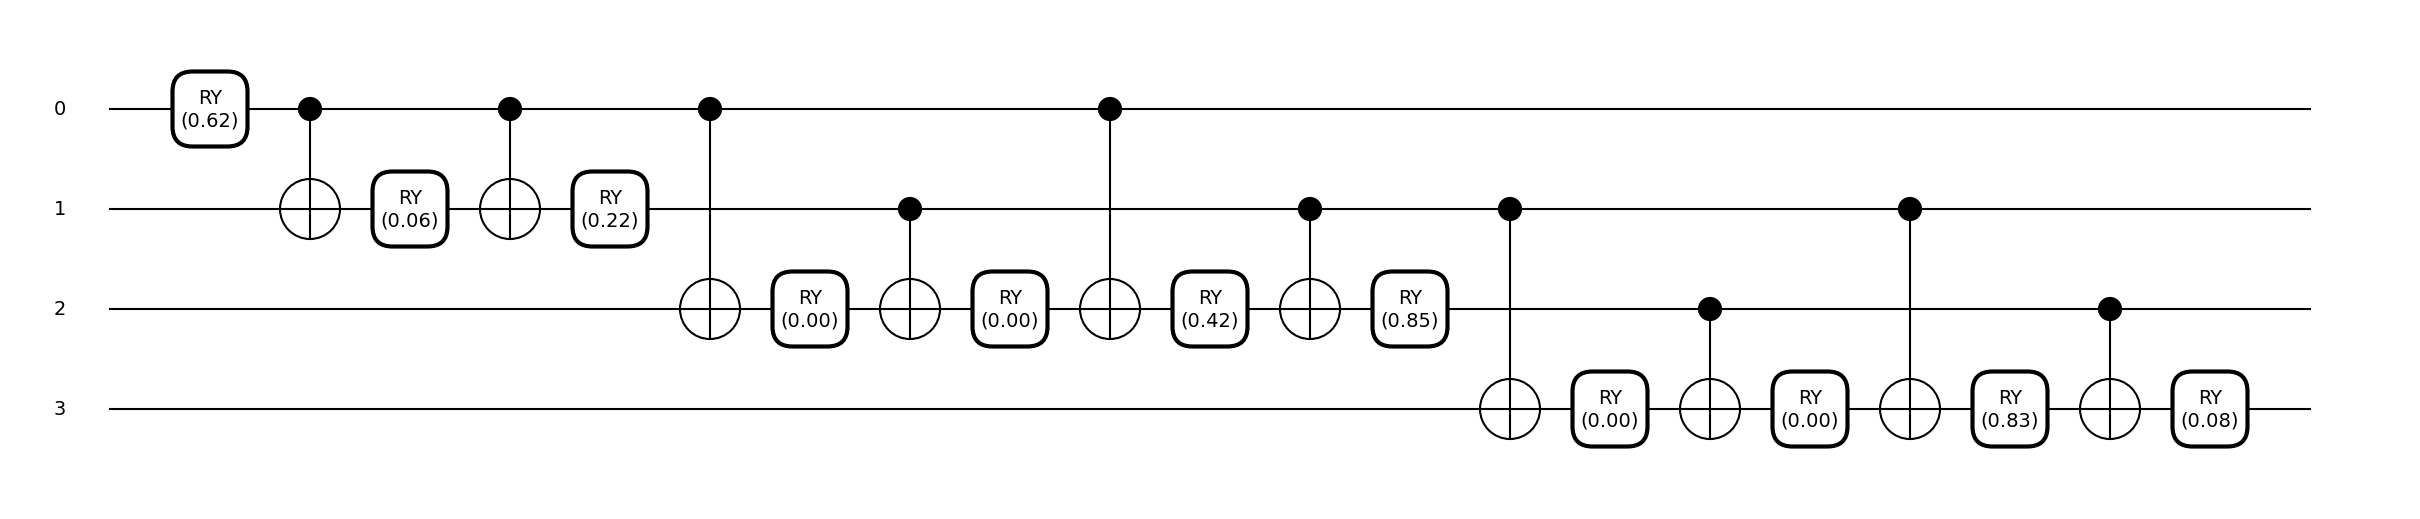

In [5]:
qml.draw_mpl(ansatz_mps.construct_circuit, decimals=2)(params_mps)
qml.draw_mpl(ansatz_larger.construct_circuit, decimals=2)(params_larger)

Let's test the state generated from each circuit

In [6]:
dev = qml.device('lightning.qubit', num_qubits)

@qml.qnode(dev)
def circuit_state(ansatz, params):
    ansatz.construct_circuit(params)
    
    return qml.state()

state_small = circuit_state(ansatz_mps, params_mps)
state_large = circuit_state(ansatz_larger, params_larger)

/home/jgidi/.local/lib/python3.11/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'main', 'autograd'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


The states are the same

In [7]:
def infidelity(state1, state2):
    return 1 - np.abs(np.vdot(state1, state2))**2

print(f'{infidelity(state_large, state_small) = }')

infidelity(state_large, state_small) = 4.440892098500626e-16
